In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [16]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [17]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

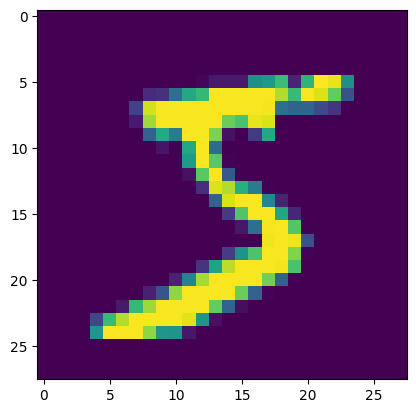

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [20]:
#it is very importantto bring the data in 0 to 1 range

In [21]:
X_train=X_train/255
X_test=X_test/255

In [22]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [26]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2737 - accuracy: 0.9224 - val_loss: 0.1471 - val_accuracy: 0.9565
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1149 - accuracy: 0.9651 - val_loss: 0.1116 - val_accuracy: 0.9663
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0810 - accuracy: 0.9750 - val_loss: 0.1006 - val_accuracy: 0.9693
Epoch 4/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0597 - accuracy: 0.9813 - val_loss: 0.0936 - val_accuracy: 0.9724
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0957 - val_accuracy: 0.9733
Epoch 6/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0372 - accuracy: 0.9870 - val_loss: 0.0920 - val_accuracy: 0.9740
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 0.0933 - val_accuracy:

In [27]:
y_prob=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [28]:
y_pred=y_prob.argmax(axis=1)

In [29]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

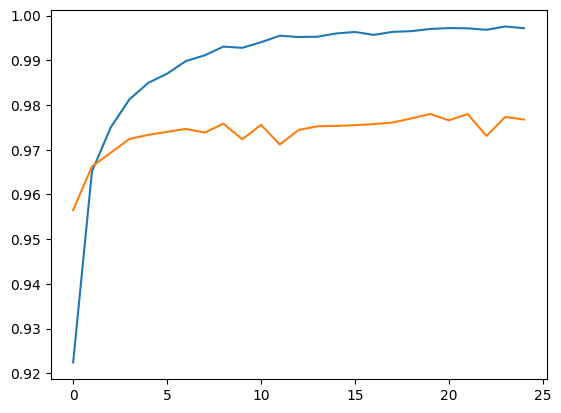

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

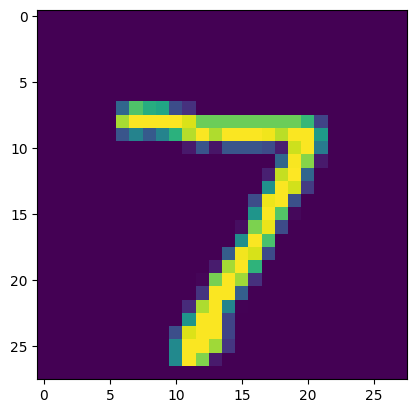

In [32]:
plt.imshow(X_test[0])

In [34]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 33ms/step


array([7])